## Complete Text Processing 

### General Feature Extraction

- File loading
- Word counts
- Characters count
- Average characters per word
- Stop words count
- Count #HashTags and @Mentions
- If numeric digits are present in twitts
- Upper case word counts



### Preprocessing and Cleaning
- Lower case
- Contraction to Expansion
- Emails removal and counts
- URLs removal and counts
- Removal of RT
- Removal of Special Characters
- Removal of multiple spaces
- Removal of HTML tags
- Removal of accented characters
- Removal of Stop Words
- Conversion into base form of words
- Common Occuring words Removal
- Rare Occuring words Removal
- Word Cloud
- Spelling Correction
- Tokenization
- Lemmatization
- Detecting Entities using NER
- Noun Detection
- Language Detection
- Sentence Translation
- Using Inbuilt Sentiment Classifier

In [2]:
import pandas as pd
import numpy as np
import spacy

In [3]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv', encoding = 'latin1')

In [5]:
df.head()

twitts  sentiment
0  is bored and wants to watch a movie  any sugge...          0
1           back in miami.  waiting to unboard ship           0
2  @misskpey awwww dnt dis brng bak memoriessss, ...          0
3                  ughhh i am so tired  blahhhhhhhhh          0
4  @mandagoforth me bad! It's funny though. Zacha...          0

In [6]:
df['sentiment'].value_counts()

0    2000
1    2000
Name: sentiment, dtype: int64

## Word Counts

In [7]:
len('this is text'.split())

3

In [9]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [0]:
df.sample(5)

In [10]:
df['word_counts'].max()

32

In [11]:
df['word_counts'].min()

1

In [12]:
df[df['word_counts']==1]

twitts  sentiment  word_counts
385                         homework           0            1
691                         @ekrelly           0            1
1124                    disappointed           0            1
1286                 @officialmgnfox           0            1
1325                        headache           0            1
1897                      @MCRmuffin           0            1
2542                      Graduated!           1            1
2947                         reading           1            1
3176                    @omeirdeleon           1            1
3470  www.myspace.com/myfinalthought           1            1
3966                        @gethyp3           1            1

# Characters Count

In [13]:
len('this is')

7

In [14]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [15]:
char_counts('this is')

6

In [18]:
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

In [19]:
df.sample(5)

twitts  sentiment  \
661   is wondering why when David finally comes to E...          0   
3110  @sugarbritchesyo he did, he got 3 wisdom teeth...          1   
3687                   Pool side! Feels like old times           1   
1276                            @icaruswingz  The cunt.          0   
78    has used more moisturer today than all the oth...          0   

      word_counts  char_counts  
661            19           83  
3110           16           81  
3687            6           26  
1276            3           20  
78             17           93

## Average Word Length

In [20]:
x = 'this is' # 6/2 = 3
y = 'thankyou guys' # 12/2 = 6

In [21]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [0]:
df.sample(4)

## Stop Words Count 

In [0]:
print(stopwords)

In [22]:
len(stopwords)

326

In [23]:
x = 'this is the text data'

In [0]:
x.split()

In [0]:
[t for t in x.split() if t in stopwords]

In [0]:
len([t for t in x.split() if t in stopwords])

In [0]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [0]:
df.sample(5)

## Count #HashTags and @Mentions 

In [0]:
x = 'this is #hashtag and this is @mention'

In [0]:
x.split()

In [0]:
[t for t in x.split() if t.startswith('@')]

In [0]:
len([t for t in x.split() if t.startswith('@')])

In [0]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [0]:
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [0]:
df.sample(5)

## If numeric digits are present in twitts

In [24]:
x = 'this is 1 and 2'

In [25]:
x.split()

['this', 'is', '1', 'and', '2']

In [26]:
x.split()[3].isdigit()

False

In [27]:
[t for t in x.split() if t.isdigit()]

['1', '2']

In [28]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [29]:
df.sample(5)

twitts  sentiment  \
2670  @Stev02008 he's still only about 6 months old,...          1   
3672              @jirehd Do you watch Daisy of Love??           1   
3435  @FabbiB: I'm looking forward to the birthday s...          1   
1600  @llauraxxx I REGRET IT   Haha i cant get over ...          0   
327   @BridgetsBeaches  dont get it here in australi...          0   

      word_counts  char_counts  avg_word_len  numerics_count  
2670           27          109      4.037037               1  
3672            7           30      4.285714               0  
3435           20           89      4.450000               0  
1600           21           91      4.333333               0  
327            21           82      3.904762               0

## UPPER case words count 

In [0]:
x = 'I AM HAPPY'
y = 'i am happy'

In [30]:
[t for t in x.split() if t.isupper()]

[]

In [31]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [0]:
df.sample(5)

In [0]:
df.iloc[3962]['twitts']

# Preprocessing and Cleaning

## Lower Case Conversion 

In [32]:
x = 'this is Text'

In [33]:
x.lower()

'this is text'

In [34]:
x = 45.0
str(x).lower()

'45.0'

In [35]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [0]:
df.sample(5)

## Contraction to Expansion 

In [36]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [39]:
x = "i'm don't he'll" # "i am do not he will"

In [37]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    

In [40]:
cont_to_exp(x)

'i am do not he will'

In [41]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

60.3 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
df.sample(5)

twitts  sentiment  \
2586  @sam_sms that sounds like a very nice life you...          1   
1405  i just went to google something then forgot wh...          0   
3083  @kayleenduhh morning  ily &lt;3 i am still on ...          1   
3344  i looooove ace of cakes! catching up on it at ...          1   
1835        @ellievontainted i know i love true bloods           0   

      word_counts  char_counts  avg_word_len  numerics_count  upper_counts  
2586           27          111      4.111111               0             1  
1405           16           62      3.875000               0             2  
3083           12           56      4.666667               0             0  
3344           11           40      3.636364               0             1  
1835            7           36      5.142857               0             6

## Count and Remove Emails 

In [43]:
import re

In [44]:
df[df['twitts'].str.contains('hotmail.com')]

twitts  sentiment  \
3713  @securerecs arghh me please  markbradbury_16@h...          1   

      word_counts  char_counts  avg_word_len  numerics_count  upper_counts  
3713            5           51          10.2               0             0

In [46]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [47]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [48]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x)

['markbradbury_16@hotmail.com']

In [49]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

In [50]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [51]:
df[df['emails_count']>0]

twitts  sentiment  \
3713  @securerecs arghh me please  markbradbury_16@h...          1   

      word_counts  char_counts  avg_word_len  numerics_count  upper_counts  \
3713            5           51          10.2               0             0   

                             emails  emails_count  
3713  [markbradbury_16@hotmail.com]             1

In [52]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

'@securerecs arghh me please  '

In [53]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

In [54]:
df[df['emails_count']>0]

twitts  sentiment  word_counts  char_counts  \
3713  @securerecs arghh me please            1            5           51   

      avg_word_len  numerics_count  upper_counts  \
3713          10.2               0             0   

                             emails  emails_count  
3713  [markbradbury_16@hotmail.com]             1

## Count URLs and Remove it 

In [55]:
x = 'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [0]:
#shh://git@git.com:username/repo.git=riif?%

In [56]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/kgptalkie')]

In [57]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [58]:
df[df['url_flags']>0].sample(5)

twitts  sentiment  \
183    photo: miss germany  http://tumblr.com/xf825f012          0   
3582  eating at the beach side at watie beach cafe. ...          1   
1916  http://twitpic.com/68n0t - waffle - this recip...          0   
3268  http://twitpic.com/696p8 2 of the kiddies who ...          1   
704   @x_imanerd_x http://twitpic.com/7y752 - you ca...          0   

      word_counts  char_counts  avg_word_len  numerics_count  upper_counts  \
183             4           44     11.000000               0             0   
3582           19          109      5.736842               0             1   
1916            9           51      5.666667               0             0   
3268           11           57      5.181818               1             0   
704             9           57      6.333333               0             0   

     emails  emails_count  url_flags  
183      []             0          1  
3582     []             0          1  
1916     []             0          1  
3268     []             0          1  
704      []             0          1

In [0]:
x

In [0]:
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

In [0]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [0]:
df.sample(5)

## Remove RT 

In [59]:
df[df['twitts'].str.contains('rt')]

twitts  sentiment  \
4     @mandagoforth me bad! it is funny though. zach...          0   
23    ut oh, i wonder if the ram on the desktop is s...          0   
59    @paulmccourt dunno what sky you're looking at!...          0   
75    im back home in belfast  im realli tired thoug...          0   
81    @lilmonkee987 i know what you mean... i feel s...          0   
...                                                 ...        ...   
3913  for the press so after she recovered she kille...          1   
3919    earned her cpr &amp; first aid certifications!           1   
3945  @teciav &quot;i look high, i look low, i look ...          1   
3951  i am soo very parched. and hungry. oh and i am...          1   
3986  @countroshculla yeah..needed to get up early.....          1   

      word_counts  char_counts  avg_word_len  numerics_count  upper_counts  \
4              26          116      4.461538               0             0   
23             14           46      3.285714               0             2   
59             15           80      5.333333               0             0   
75             22           84      3.818182               0             1   
81             11           48      4.363636               0             0   
...           ...          ...           ...             ...           ...   
3913           24          100      4.166667               0             0   
3919            7           40      5.714286               0             1   
3945           23          106      4.608696               0             0   
3951           21           87      4.142857               2             1   
3986           10           69      6.900000               0             0   

     emails  emails_count  url_flags  
4        []             0          0  
23       []             0          0  
59       []             0          0  
75       []             0          0  
81       []             0          0  
...     ...           ...        ...  
3913     []             0          0  
3919     []             0          0  
3945     []             0          0  
3951     []             0          0  
3986     []             0          0  

[382 rows x 10 columns]

In [66]:
x = '[removed] @username: hello hirt'

In [67]:
re.sub(r'\bremoved\b', '', x).strip()

'[] @username: hello hirt'

In [68]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\bremoved\b', '', x).strip())

## Special Chars removal or punctuation removal 

In [69]:
df.sample(3)

twitts  sentiment  \
590   i am reminded how much i hate summer heat  hea...          0   
3919     earned her cpr &amp; first aid certifications!          1   
1691  @bowl_the_bunny it does. i do not even get exc...          0   

      word_counts  char_counts  avg_word_len  numerics_count  upper_counts  \
590            12           48      4.000000               0             2   
3919            7           40      5.714286               0             1   
1691           26          106      4.076923               0             4   

     emails  emails_count  url_flags  
590      []             0          0  
3919     []             0          0  
1691     []             0          0

In [70]:
x = '@duyku apparently i was not ready enough... i...'

In [71]:
re.sub(r'[^\w ]+', "", x)

'duyku apparently i was not ready enough i'

In [72]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [73]:
df.sample(5)

twitts  sentiment  \
1215  on train home  train full and lots of drunk me...          0   
657   i need a bf lol anyone wanna sign up haha the ...          0   
3900  rtroth let me know whenwhere you open your tea...          1   
2569  just listened to old voice comments on my snap...          1   
401   morning my throat is still sore definitely get...          0   

      word_counts  char_counts  avg_word_len  numerics_count  upper_counts  \
1215           19           74      3.894737               0             0   
657            32          105      3.281250               0             4   
3900           10           46      4.600000               0             0   
2569           16           73      4.562500               0             1   
401            22          113      5.136364               0             0   

     emails  emails_count  url_flags  
1215     []             0          0  
657      []             0          0  
3900     []             0          0  
2569     []             0          0  
401      []             0          0

## Remove multiple spaces `"hi   hello    "`

In [74]:
x =  'hi    hello     how are you'

In [75]:
' '.join(x.split())

'hi hello how are you'

In [76]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join(x.split()))

## Remove HTML tags

In [0]:
!pip install lxml

In [77]:
from bs4 import BeautifulSoup

In [78]:
x = '<html><h1> thanks for watching it </h1></html>'

In [79]:
x.replace('<html><h1>', '').replace('</h1></html>', '') #not rec

' thanks for watching it '

In [83]:
soup =  BeautifulSoup(x,  "html.parser")

In [84]:
BeautifulSoup(x, 'html.parser').get_text().strip()

'thanks for watching it'

In [85]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())

CPU times: user 267 ms, sys: 1.22 ms, total: 269 ms
Wall time: 281 ms


## Remove Accented Chars 

In [86]:
x = 'Áccěntěd těxt'

In [87]:
import unicodedata

In [88]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [89]:
remove_accented_chars(x)

'Accented text'

In [90]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

## Remove Stop Words 

In [0]:
x = 'this is a stop words'

In [0]:
' '.join([t for t in x.split() if t not in stopwords])

In [0]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [0]:
df.sample(5)

## Convert into base or root form of word 

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
x = 'this is chocolates. what is times? this balls'

In [0]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

In [0]:
make_to_base(x)

In [0]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

In [0]:
df.sample(5)

## Common words removal 

In [91]:
x = 'this is this okay bye'

In [92]:
text = ' '.join(df['twitts'])

In [93]:
len(text)

284633

In [94]:
text = text.split()

In [95]:
len(text)

53667

In [96]:
freq_comm = pd.Series(text).value_counts()

In [97]:
f20 = freq_comm[:20]

In [98]:
f20

i       2392
to      1363
the     1299
a        957
is       877
my       825
you      822
it       735
and      733
not      599
in       571
for      521
of       482
am       472
that     435
me       432
on       427
have     419
so       373
at       320
dtype: int64

In [99]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [100]:
df.sample(5)

twitts  sentiment  \
3571  bobbythomas1 methinks get up earlier sorry mis...          1   
2431  dannygokey aww well least got some sleep liked...          1   
650               jovanh yep tweeting while driving too          0   
3780  ooh_its_allyson yeaa imaa record xd or jazmine...          1   
66    anthothemantho hahaha agree cried like baby wh...          0   

      word_counts  char_counts  avg_word_len  numerics_count  upper_counts  \
3571           20           90      4.500000               0             2   
2431           22           92      4.181818               0             2   
650             6           34      5.666667               0             0   
3780           22           85      3.863636               0             2   
66             16           71      4.437500               0             0   

     emails  emails_count  url_flags  
3571     []             0          0  
2431     []             0          0  
650      []             0          0  
3780     []             0          0  
66       []             0          0

## Rare words removal 

In [101]:
rare20 = freq_comm.tail(20)

In [102]:
rare20

children               1
wsendoutscuds          1
httptwitpiccom6uvgi    1
creamm                 1
abc                    1
greekshow              1
kai                    1
meriah                 1
yg                     1
sambutannya            1
makasih                1
permit                 1
harizadri              1
mets                   1
belive                 1
voodoo                 1
pitching               1
alexs                  1
lbbchat                1
rerunlovin             1
dtype: int64

In [103]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [104]:
df.sample(5)

twitts  sentiment  \
3770                  watching stardust love this movie          1   
1533  lovin her lululemon shortsmaybe should start g...          0   
2281  shame can hear parents talking about smirks an...          1   
3074  spending lot more time twitter after installin...          1   
2308  graceawong lmao if kitchen had been cool then ...          1   

      word_counts  char_counts  avg_word_len  numerics_count  upper_counts  \
3770            6           31      5.166667               0             0   
1533           19           88      4.631579               0             2   
2281           21          101      4.809524               0             0   
3074           21          100      4.761905               0             1   
2308           24          112      4.666667               0             2   

     emails  emails_count  url_flags  
3770     []             0          0  
1533     []             0          0  
2281     []             0          0  
3074     []             0          0  
2308     []             0          0

## Word Cloud Visualization 

In [0]:
# !pip install wordcloud

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
text = ' '.join(df['twitts'])

In [107]:
len(text)

236970

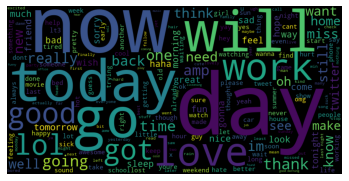

In [108]:
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction 

In [0]:
!pip install -U textblob

In [109]:
!python -m textblob.download_corpora

/usr/bin/python: No module named textblob


In [110]:
from textblob import TextBlob

In [124]:
x = 'thankks forr waching it'

In [125]:
x = TextBlob(x).correct()

In [126]:
str(x)

'thanks for watching it'

In [127]:
df['twitts']=df['twitts'].apply(lambda x:str(TextBlob(x).correct()))

KeyboardInterrupt: 

## Tokenization using TextBlob


In [115]:
x = 'thanks#watching this video. please like it'

In [116]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [117]:
doc = nlp(x)
for token in doc:
    print(token)

NameError: name 'nlp' is not defined

## Detecting Nouns 

In [0]:
x = 'Breaking News: Donal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [0]:
doc = nlp(x)

In [0]:
for noun in doc.noun_chunks:
    print(noun)

## Language Translation and Detection

Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [119]:
x

'thanks#watching this video. please like it'

In [121]:
tb.detect_language()

HTTPError: HTTP Error 400: Bad Request

In [122]:
tb.translate(to = 'zh')

AttributeError: 'list' object has no attribute 'strip'

## Use TextBlob's Inbuilt Sentiment Classifier 

In [0]:
from textblob.sentiments import NaiveBayesAnalyzer

In [0]:
x = 'we all stands together. we are gonna win this fight'

In [0]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [0]:
tb.sentiment